# Trading options and gaining or losing money

You start with ¥ 10,000 and can buy as many of the following call options as you want.

* Cost of 1 call option: ¥ 100
* Strike price: ¥ 10,500
* According to your pricing model, the underlying stock will have a price at the option expiry date distributed according to Normal(¥ 10,500, (¥ 300)²). So, the strike price and the expected value of the stock price are the same.

Work through the tasks below to determine a good trading strategy for maximizing your gains and limiting your losses while trading these options.

## Getting started

Run the code cell below and understand how the output is computed. The output shows the (random) result of buying one call option and waiting until the option expiry date.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_money_at_option_expiry(
    money_at_start, options_purchased, price_per_option=100,
    strike_price=10500, expiry_price_mean=10500, expiry_price_stdev=300):

    '''
    Calculate how much money you have after buying some number of call
    options with a strike price of `strike_price`, and waiting for them to
    expire. The value of the underlying stock at expiry is a sample from a
    normal distribution with mean `expiry_mean_price` and standard
    deviation `expiry_price_stdev`.

    Arguments:

        money_at_start (float) How much money you have before buying the
          options.

        options_purchased (int) How many options you purchase.

        price_per_option (float) The price of 1 option.

        strike_price (float) The strike price of the option.

        expiry_price_mean (float) The mean of the normal distribution of
          the stock price at expiry.

        expiry_price_stdev (float) The standard deviation of the normal
          distribution of the stock price at expiry.

    All arguments can also be NumPy arrays instead of scalars.

    Returns: (float or array) the amount of money you have left after the
      options expired, based on the random sample(s) from the final stock
      price distribution.
    '''
    stock_price = np.random.normal(
        expiry_price_mean, expiry_price_stdev,
        size=np.shape(money_at_start))
    option_value_at_expiry = np.maximum(0, stock_price - strike_price)
    money_at_end = (
        money_at_start
        - options_purchased * price_per_option
        + options_purchased * option_value_at_expiry)
    return money_at_end

In [117]:
# Buy 1 option and see what happens. You can run this cell a few times to
# see different random outcomes.

money_at_start = 10000
price_per_option = 100
options = 1

money_at_end = calculate_money_at_option_expiry(money_at_start, options, price_per_option)

print(f'We started with ¥ {money_at_start:.2f}')
print(f'We bought {options} option(s)')
print(f'We ended up with ¥ {money_at_end:.2f}')

We started with ¥ 10000.00
We bought 1 option(s)
We ended up with ¥ 9900.00


## Task 1

Use the function above to simulate buying 1 option 100,000 times and
plot a histogram of the results using 100 histogram bins. This histogram
will show the distribution over how much money you might have left
when starting with ¥ 10,000 and buying 1 option. Also, use your results
to compute the average, 25th, 50th, and 75th percentiles, and risk of
loss for this trade. (The risk of ruin is 0 since it's impossible to lose
all your money when buying only 1 option.)

1. Plot a histogram.
2. Compute the average amount of money you end up with and plot it on the histogram.
3. Compute the 25th, 50th, and 75th percentiles and plot them on the histogram.
4. Compute the risk of loss.

In [87]:
# Run the simple simulation above 100,000 times and record results
end_cash = [] 

for i in range(100000):
    money_at_start = 10000
    price_per_option = 100
    options = 1
    end_cash.append(calculate_money_at_option_expiry(money_at_start, options, price_per_option))

per_25th = np.quantile(end_cash, 0.25)
per_50th = np.median(end_cash)
per_75th = np.quantile(end_cash, 0.75)




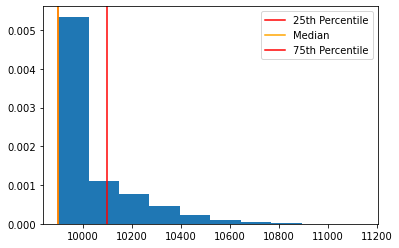

25th Percentile: 9900.0
Median: 9900.0
75th Percentile: 10100.090945305707
Risk of loss: 0.63 


In [88]:
# Plot a histogram of the results and print out the metrics
plt.hist(end_cash, density = True)
plt.axvline(per_25th, label = '25th Percentile', color = 'red')
plt.axvline(per_50th, label = 'Median', color = 'orange')
plt.axvline(per_75th, label = '75th Percentile', color = 'red')
plt.legend()
plt.show()

print('25th Percentile:', per_25th)
print('Median:', per_50th)
print('75th Percentile:', per_75th)

# Calculate risk of loss (probability of having money less than what we started with)

end_cash = np.array(end_cash)

losses = len(np.where(end_cash < money_at_start)[0])

risk_loss = losses / len(end_cash)
print(f"Risk of loss: {risk_loss:.2f} ")


## Task 2

You now get to play the game of risking some money on buying options repeatedly. To start with, assume you buy 1 option (as in Task 1) but you do it 20 times in sequence.

1. Buy 1 option and let it expire. You will now have a little more or less money than you started with.
2. Buy another option and let it expire.
3. You can make at most 20 such trades. If you have less than ¥ 100 (the price of 1 option) left, you lost all your money and cannot make any more trades.

Reuse and update your code from Task 1 to simulate this scenario. Plot the resulting histogram and compute the same metrics as in Task 1.

### Questions

1. Are we making money or losing money, on average?
2. What is the minimum amount of money we can end up with? Explain why.

### Answers:
1. We are making money in average (mean = 10392.61) 
2. Minimum amount of money =  8111)

In [130]:
# Compute the money left after 20 trades of 1 option for 100,000 trials
end_cash_2 = []

for i in range(100000):
    money_at_start = 10000

    for j in range(20):
        curr_money = money_at_start
        price_per_option = 100
        options = 1
        
        new_money = calculate_money_at_option_expiry(curr_money, options, price_per_option)
        
        money_at_start = new_money
        
        if curr_money < 100:
            end_cash_2.append(0)
            break 
    
    end_cash_2.append(new_money)
        



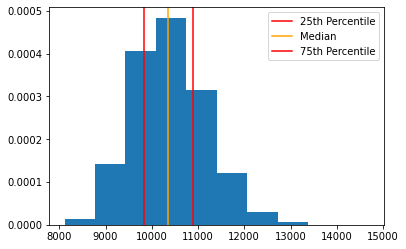

95% Confidence Interval: [ 9005.80498147 12060.56534065]
Median: 10341.017294472396
Mean 10392.796543766193
Risk of loss: 0.33 
Min: 8111.728518936208


In [132]:
# Plot a histogram of the results and print out the metrics


plt.hist(end_cash_2, density = True)
plt.axvline(np.quantile(end_cash_2, 0.25), label = '25th Percentile', color = 'red')
plt.axvline(np.median(end_cash_2), label = 'Median', color = 'orange')
plt.axvline(np.quantile(end_cash_2, 0.75), label = '75th Percentile', color = 'red')
plt.legend()
plt.show()

print('95% Confidence Interval:', np.quantile(end_cash_2, [0.025, 0.975]))
print('Median:', np.median(end_cash_2))
print("Mean", np.mean(end_cash_2))

# Calculate risk of loss (probability of having money less than what we started with)

end_cash_2 = np.array(end_cash_2)
money_at_start = 10000
losses = len(np.where(end_cash_2 < money_at_start)[0])

risk_loss = losses / len(end_cash)
print(f"Risk of loss: {risk_loss:.2f} ")
print("Min:", min(end_cash_2))

## Task 3

Modify the code in Task 2 such that, rather than buying only 1 option in each of the 20 trades, you risk 30% of your money on every trade. So, for example, if you have ¥ 5,000 left, you would risk ¥ 1,500 and buy 15 options at ¥ 100 per option. You should round the number of options to the nearest integer.

1. Use 30% of your remaining money to buy options let them expire. You will now have more or less money than you started with.
3. You can make at most 20 such trades. If you have less than ¥ 100 (the price of 1 option) left, you lost all your money and cannot make any more trades.

Reuse and update your code from Task 2 to simulate this scenario. Plot the resulting histogram and compute the same metrics as in Task 1. You should now add the _risk of ruin_ metric since you might run out of money.

### Questions

1. Are we making money or losing money, on average?
2. Should we risk more or less than 30% of our money on each trade?

### Answers

1. We are losing money in average (Mean = 3131)
2. We should risk more in order to gain 

In [133]:
# Compute the money left after 20 trades with 30% risked per trade for
# 100,000 trials

end_cash_3 = []
risk = 0.3

for i in range(100000):
    money_at_start = 10000

    for j in range(20):
        curr_money = money_at_start
        price_per_option = 100
        options = 1
        
        new_money = calculate_money_at_option_expiry(curr_money*risk, options, price_per_option)
        
        new_money_diff = new_money - curr_money*risk
        
        money_at_start += new_money_diff
        
        if curr_money < 100:
            end_cash_3.append(0)
            break 
    
    end_cash_3.append(new_money)




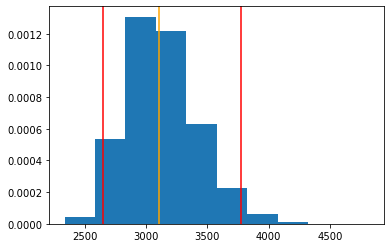

95% Confidence Interval: [2647.67129084 3770.68568463]
Median: 3103.2621919682097
Mean 3131.404582310571
Risk of loss: 1.00 


In [134]:
# Plot a histogram of the results and print out the metrics
conf_int_95 = np.quantile(end_cash_3, [0.025, 0.975])
task_3_mean = np.mean(end_cash_3)
task_3_median = np.median(end_cash_3)

plt.hist(end_cash_3, density = True)
plt.axvline(conf_int_95[0], label = '95% Confidence Interval', color = 'red')
plt.axvline(np.median(end_cash_3), label = 'Median', color = 'orange')
plt.axvline(conf_int_95[1], color = 'red')
plt.show()


print('95% Confidence Interval:', np.quantile(end_cash_3, [0.025, 0.975]))
print('Median:', np.median(end_cash_3))
print("Mean", np.mean(end_cash_3))

# Calculate risk of loss (probability of having money less than what we started with)

end_cash_3 = np.array(end_cash_3)
money_at_start = 10000
losses = len(np.where(end_cash_3 < money_at_start)[0])

risk_loss = losses / len(end_cash)
print(f"Risk of loss: {risk_loss:.2f} ")

## Task 4 (optional)

Determine the optimal fraction of your money to risk on each trade. It's not 30%. Which metric(s) should you use for this optimization?